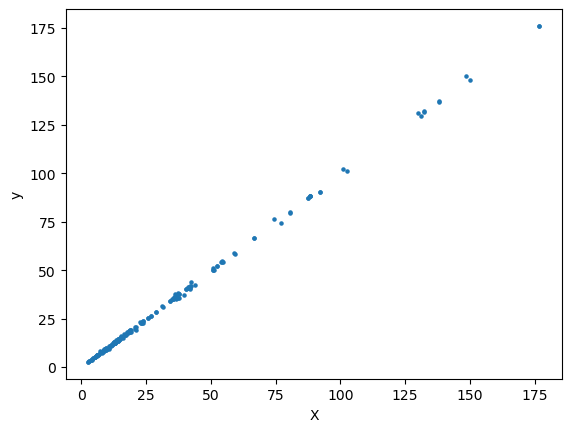

model score: 0.9999085679597339


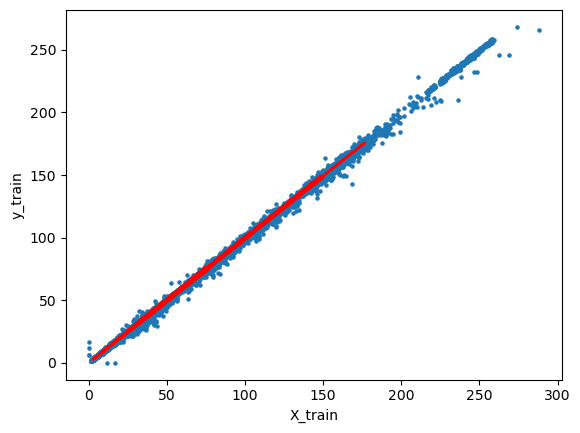

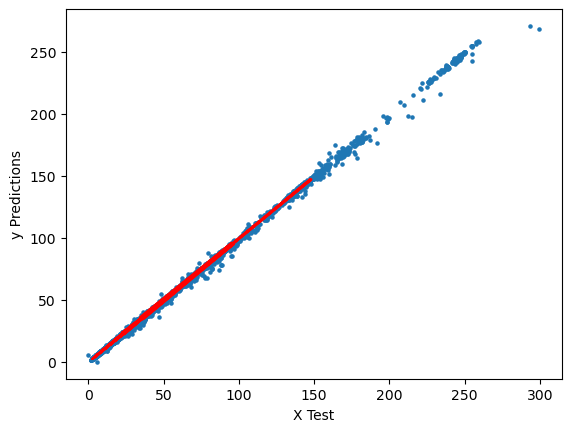

mean squared error: 0.4034375940417181


In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

data_file = '../Data_files'+os.sep+'stocks.csv'

df = pd.read_csv(data_file)

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

X = df[['Open', 'High']]
y = df[['Close', 'Low']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 36)

plt.scatter(X_train.head(100), y_train.head(100), s=5)
plt.xlabel('X')
plt.ylabel('y')
plt.show()


model = LinearRegression()
model.fit(X_train.head(100), y_train.head(100))
Score = model.score(X_train.head(100), y_train.head(100))
print(f'model score: {Score}')



pred = model.predict(X_train.head(100))

plt.scatter(X_train, y_train, s=5)
plt.plot(X_train.head(100),pred,color='red')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.show()

pred = model.predict(X_test.head(100))

plt.scatter(X_test, y_test, s=5)
plt.plot(X_test.head(100),pred,color='red')
plt.xlabel('X Test')
plt.ylabel('y Predictions')
plt.show()

mean_error = mean_squared_error(y_test.head(100), pred)
print(f'mean squared error: {mean_error}')